# SWMAL Exercise

### MAL Group-Nr. 15
13-09-2025

| Name   | ID        |
|--------|-----------|                       
| John   | 202209849 |
| Khaled | 202307853 |
| Jahye  | 202309135 |

## Performance Metrics

There are a number of frequently uses metrics in supervised binary classification, namely accuracy, precision, recall and the $F_1$ score. All are called performance _metrics_, though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time.

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
    \def\rem#1{}
    \rem{MACRO arr: array <#1:columns (lcr..)> <#2:content>}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \rem{MACRO st: subscript text <#1:content>}
    \def\st#1{_{\textrm{#1}}}
    \rem{MACRO boldmatrix: bold matix/vector notation} 
    \def\boldmatrix#1{\mathbf{#1}} 
    \rem{MACROS y: bold y} 
    \def\by{\boldmatrix{y}}
    \def\myfrac#1#2{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}}
\ar{rl}{
  p &= \myfrac{TP}{TP + FP}
}
$$

### Recall or Sensitivity

$$
  \ar{rl}{
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  }
$$

### Accuracy

$$
  \ar{rl}{
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  }\
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ar{rl}{
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  }
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
\def\Mconf{\boldmatrix{M}\st{confusion}}
\Mconf~~~ = 
\ar{l|ll}{
                             & \textrm{actual true} & \textrm{actual false} \\ \hline
    \textrm{predicted true}  & TP & FP \\     
    \textrm{predicted false} & FN & TN 
}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.110/fig 3-3. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
\Mconf~~~ =
  \left[
  \ar{llll}{
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
 }
 \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Remember to use the '5/not-5' ground-truth data, ala

```python
    y_train_5 = (y_train == '5')    
    y_test_5  = (y_test == '5')
```

not the full 10 class MNIST output categories, since we are dealing with metrics handling only pure binary classifiers (well, there is a way to deal with this using micro/macro averaging of multiclass classifiers, you meet these in the gridsearch exercise later).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def MyAccuracy(y_true, y_pred):
    """Calculate accuracy: (correct predictions) / (total predictions)"""
    correct = 0
    total = len(y_true)
    
    if total == 0:  # avoid division by zero
        return 0.0
    
    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1
    
    return correct / total

# Load MNIST data
def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y=True, cache=True)
    return X.values, y.values

# Get data and prepare binary classification
X, y = MNIST_GetDataSet()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Create binary labels (5 vs not-5)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# Dummy classifier - always predicts False (not-5)
class DummyClassifier:
    def fit(self, X, y):
        return self
    def predict(self, X):
        return [False] * len(X)

# Train classifiers
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

# Make predictions
sgd_pred = sgd_clf.predict(X_test)
dummy_pred = dummy_clf.predict(X_test)

# Test MyAccuracy vs sklearn
print("SGD Classifier:")
my_acc_sgd = MyAccuracy(y_test_5, sgd_pred)
sklearn_acc_sgd = accuracy_score(y_test_5, sgd_pred)
print(f"My accuracy:      {my_acc_sgd:.3f}")
print(f"Sklearn accuracy: {sklearn_acc_sgd:.3f}")
print(f"Difference:       {abs(my_acc_sgd - sklearn_acc_sgd):.6f}")

print("\nDummy Classifier:")
my_acc_dummy = MyAccuracy(y_test_5, dummy_pred)
sklearn_acc_dummy = accuracy_score(y_test_5, dummy_pred)
print(f"My accuracy:      {my_acc_dummy:.3f}")
print(f"Sklearn accuracy: {sklearn_acc_dummy:.3f}")
print(f"Difference:       {abs(my_acc_dummy - sklearn_acc_dummy):.6f}")

SGD Classifier:
My accuracy:      0.966
Sklearn accuracy: 0.966
Difference:       0.000000

Dummy Classifier:
My accuracy:      0.906
Sklearn accuracy: 0.906
Difference:       0.000000


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

def MyPrecision(y_true, y_pred):
    """Precision = TP / (TP + FP)"""
    tp = 0  # true positives
    fp = 0  # false positives
    
    for i in range(len(y_true)):
        if y_pred[i] == True and y_true[i] == True:
            tp += 1
        elif y_pred[i] == True and y_true[i] == False:
            fp += 1
    
    if tp + fp == 0:  # avoid division by zero
        return 0.0
    return tp / (tp + fp)

def MyRecall(y_true, y_pred):
    """Recall = TP / (TP + FN)"""
    tp = 0  # true positives  
    fn = 0  # false negatives
    
    for i in range(len(y_true)):
        if y_pred[i] == True and y_true[i] == True:
            tp += 1
        elif y_pred[i] == False and y_true[i] == True:
            fn += 1
    
    if tp + fn == 0:  # avoid division by zero
        return 0.0
    return tp / (tp + fn)

def MyF1Score(y_true, y_pred):
    """F1 = 2 * (precision * recall) / (precision + recall)"""
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    
    if precision + recall == 0:  # avoid division by zero
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

# Test on SGD classifier
print("SGD Classifier Metrics:")
my_prec_sgd = MyPrecision(y_test_5, sgd_pred)
sklearn_prec_sgd = precision_score(y_test_5, sgd_pred)
print(f"Precision - My: {my_prec_sgd:.3f}, Sklearn: {sklearn_prec_sgd:.3f}")

my_rec_sgd = MyRecall(y_test_5, sgd_pred)
sklearn_rec_sgd = recall_score(y_test_5, sgd_pred)
print(f"Recall    - My: {my_rec_sgd:.3f}, Sklearn: {sklearn_rec_sgd:.3f}")

my_f1_sgd = MyF1Score(y_test_5, sgd_pred)
sklearn_f1_sgd = f1_score(y_test_5, sgd_pred)
print(f"F1        - My: {my_f1_sgd:.3f}, Sklearn: {sklearn_f1_sgd:.3f}")

# Test on Dummy classifier
print("\nDummy Classifier Metrics:")
my_prec_dummy = MyPrecision(y_test_5, dummy_pred)
sklearn_prec_dummy = precision_score(y_test_5, dummy_pred, zero_division=0)
print(f"Precision - My: {my_prec_dummy:.3f}, Sklearn: {sklearn_prec_dummy:.3f}")

my_rec_dummy = MyRecall(y_test_5, dummy_pred)
sklearn_rec_dummy = recall_score(y_test_5, dummy_pred)
print(f"Recall    - My: {my_rec_dummy:.3f}, Sklearn: {sklearn_rec_dummy:.3f}")

my_f1_dummy = MyF1Score(y_test_5, dummy_pred)
sklearn_f1_dummy = f1_score(y_test_5, dummy_pred)
print(f"F1        - My: {my_f1_dummy:.3f}, Sklearn: {sklearn_f1_dummy:.3f}")

# Show counts for understanding
tp_sgd = sum(1 for i in range(len(y_test_5)) if sgd_pred[i] == True and y_test_5[i] == True)
fp_sgd = sum(1 for i in range(len(y_test_5)) if sgd_pred[i] == True and y_test_5[i] == False)
fn_sgd = sum(1 for i in range(len(y_test_5)) if sgd_pred[i] == False and y_test_5[i] == True)

print(f"\nSGD Confusion Matrix counts:")
print(f"True Positives:  {tp_sgd}")
print(f"False Positives: {fp_sgd}")
print(f"False Negatives: {fn_sgd}")

SGD Classifier Metrics:
Precision - My: 0.853, Sklearn: 0.853
Recall    - My: 0.767, Sklearn: 0.767
F1        - My: 0.808, Sklearn: 0.808

Dummy Classifier Metrics:
Precision - My: 0.000, Sklearn: 0.000
Recall    - My: 0.000, Sklearn: 0.000
F1        - My: 0.000, Sklearn: 0.000

SGD Confusion Matrix counts:
True Positives:  719
False Positives: 124
False Negatives: 218


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_test_5_pred, y_test5)
```

instead of 
```python
confusion_matrix(y_test_5, y_test_5_pred)
```

In [6]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
print("Confusion Matrices:")

# Dummy classifier confusion matrix
M_dummy = confusion_matrix(y_test_5, dummy_pred)
print("Dummy Classifier:")
print(M_dummy)

# SGD classifier confusion matrix  
M_sgd = confusion_matrix(y_test_5, sgd_pred)
print("\nSGD Classifier:")
print(M_sgd)

# Explain the matrix layout
print("\nMatrix Layout:")
print("confusion_matrix(y_true, y_pred)")
print("[[TN  FP]")
print(" [FN  TP]]")
print()

# Extract values for SGD classifier
tn_sgd = M_sgd[0,0]
fp_sgd = M_sgd[0,1] 
fn_sgd = M_sgd[1,0]
tp_sgd = M_sgd[1,1]

print(f"\nSGD Classifier breakdown:")
print(f"TN (True Negatives):  {tn_sgd}")
print(f"FP (False Positives): {fp_sgd}")
print(f"FN (False Negatives): {fn_sgd}")
print(f"TP (True Positives):  {tp_sgd}")

# Test wrong parameter order
print("\nWhat happens with wrong parameter order:")
M_wrong = confusion_matrix(sgd_pred, y_test_5)  # swapped parameters
print("confusion_matrix(y_pred, y_true) - WRONG ORDER:")
print(M_wrong)
print("This gives the TRANSPOSED matrix - completely different results!")

Confusion Matrices:
Dummy Classifier:
[[9063    0]
 [ 937    0]]

SGD Classifier:
[[8939  124]
 [ 218  719]]

Matrix Layout:
confusion_matrix(y_true, y_pred)
[[TN  FP]
 [FN  TP]]


SGD Classifier breakdown:
TN (True Negatives):  8939
FP (False Positives): 124
FN (False Negatives): 218
TP (True Positives):  719

What happens with wrong parameter order:
confusion_matrix(y_pred, y_true) - WRONG ORDER:
[[8939  218]
 [ 124  719]]
This gives the TRANSPOSED matrix - completely different results!


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.122-125.

This heat map could be an important guide for you when analysing multiclass data in the future.

HOML Style Heat Maps


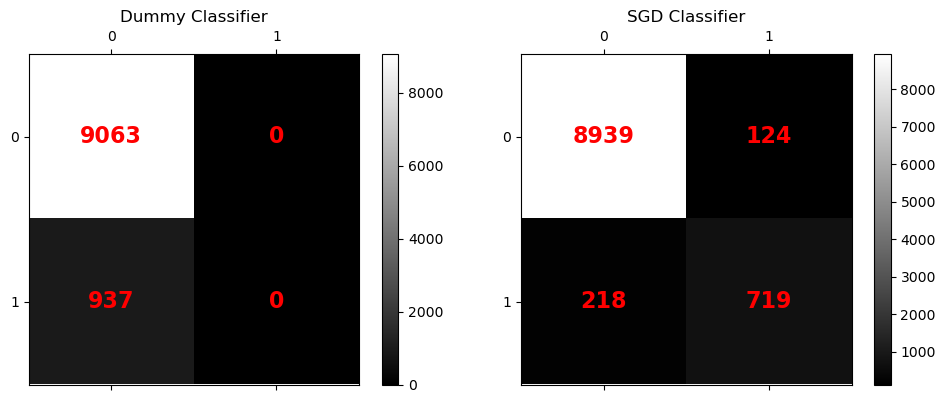

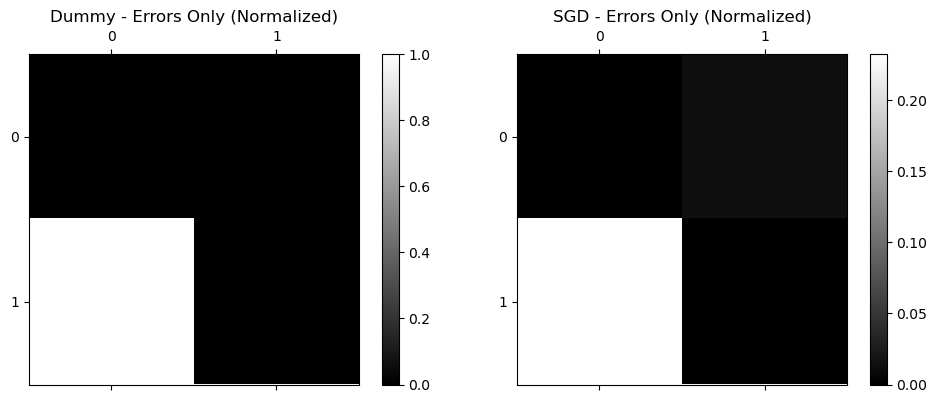

HOML Analysis:
Raw matrices show:
- Dummy: TN=9063, FP=0, FN=937, TP=0
- SGD: TN=8939, FP=124, FN=218, TP=719

Error-only matrices reveal:
- Dummy: 100% false negative rate (bright [1,0]) - misses ALL 5s
- SGD: Much lower error rates in both directions
- SGD finds most 5s (TP=719) with few false alarms (FP=124)

Key insight: SGD dramatically reduces false negatives while
keeping false positives low - much better than dummy baseline


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# HOML style confusion matrix visualization
print("HOML Style Heat Maps")
print("===================")

# Raw confusion matrices using matshow (HOML approach)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.matshow(M_dummy, cmap=plt.cm.gray, fignum=False)
plt.title('Dummy Classifier')
plt.colorbar()
# Add numbers on the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, M_dummy[i, j], ha="center", va="center", 
                color="red", fontsize=16, weight='bold')

plt.subplot(1, 2, 2)  
plt.matshow(M_sgd, cmap=plt.cm.gray, fignum=False)
plt.title('SGD Classifier')
plt.colorbar()
# Add numbers on the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, M_sgd[i, j], ha="center", va="center",
                color="red", fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

# Normalize by row sums and focus on errors (HOML approach)
row_sums_dummy = M_dummy.sum(axis=1, keepdims=True)
norm_M_dummy = M_dummy / row_sums_dummy

row_sums_sgd = M_sgd.sum(axis=1, keepdims=True)
norm_M_sgd = M_sgd / row_sums_sgd

# Fill diagonal with zeros to keep only errors
norm_M_dummy_errors = norm_M_dummy.copy()
norm_M_sgd_errors = norm_M_sgd.copy()
np.fill_diagonal(norm_M_dummy_errors, 0)
np.fill_diagonal(norm_M_sgd_errors, 0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.matshow(norm_M_dummy_errors, cmap=plt.cm.gray, fignum=False)
plt.title('Dummy - Errors Only (Normalized)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.matshow(norm_M_sgd_errors, cmap=plt.cm.gray, fignum=False)
plt.title('SGD - Errors Only (Normalized)')
plt.colorbar()

plt.tight_layout()
plt.show()

# HOML style analysis
print("HOML Analysis:")
print("==============")
print("Raw matrices show:")
print("- Dummy: TN=9063, FP=0, FN=937, TP=0")
print("- SGD: TN=8939, FP=124, FN=218, TP=719")
print()
print("Error-only matrices reveal:")
print("- Dummy: 100% false negative rate (bright [1,0]) - misses ALL 5s")
print("- SGD: Much lower error rates in both directions")
print("- SGD finds most 5s (TP=719) with few false alarms (FP=124)")
print()
print("Key insight: SGD dramatically reduces false negatives while")
print("keeping false positives low - much better than dummy baseline")


### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

These exercises showed why accuracy alone isn't enough to evaluate classifiers. We built our own accuracy, precision, recall and F1 functions from scratch to understand what these metrics actually calculate.

The dummy classifier achieved 90% accuracy just by always guessing "not-5", which sounds impressive until you realize it never finds any 5s. This demonstrates the accuracy paradox - high accuracy can be misleading with imbalanced data.

Precision measures how many predicted positives are actually positive, while recall measures how many actual positives we found. The F1 score balances both. The dummy classifier had zero precision and recall because it never predicted positive.

Confusion matrices made these concepts visual. The HOML-style heat maps revealed error patterns clearly - the dummy classifier only made false negative errors, while SGD made both types but far fewer overall.

The key insight is that different metrics highlight different aspects of performance. In medical diagnosis, missing a disease (false negative) might be worse than a false alarm (false positive).

REVISIONS||
:- | :- |
2018-12-19| CEF, initial.
2018-02-07| CEF, updated.
2018-02-07| CEF, rewritten accuracy paradox section.
2018-03-05| CEF, updated with SHN comments.
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-02-17| CEF, added implementation note on denominator=0.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2020-09-21| CEF, fixed factor 2 error in beta-harmonic.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 STMAL.
2023-02-07| CEF, update HOML page numbers.
2023-02-09| CEF, chagned y_train to y_test in conf. matrix call.
2023-08-30| CEF, minor table change.
2023-10-02| CEF, changed LaTeX commands to defs to get both KaTeX and MathJax to work.
2023-10-10| CEF, elaborated on binary classifer data (y=='5'), and not using full 10-class MNIST categories. 